In [207]:
import pandas as pd
import numpy as np

In [208]:
df = pd.read_csv("data/500hits.csv")
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [209]:
df.drop(columns=["PLAYER"], inplace=True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YRS     465 non-null    int64  
 1   G       465 non-null    int64  
 2   AB      465 non-null    int64  
 3   R       465 non-null    int64  
 4   H       465 non-null    int64  
 5   2B      465 non-null    int64  
 6   3B      465 non-null    int64  
 7   HR      465 non-null    int64  
 8   RBI     465 non-null    int64  
 9   BB      465 non-null    int64  
 10  SO      465 non-null    int64  
 11  SB      465 non-null    int64  
 12  CS      465 non-null    int64  
 13  BA      465 non-null    float64
 14  HOF     465 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 54.6 KB


In [211]:
X, y = df.iloc[:, 0:14], df.iloc[:, 14]

In [212]:
X.columns

Index(['YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB',
       'CS', 'BA'],
      dtype='object')

In [213]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = scale.fit_transform(X)
X = pd.DataFrame(
    X,
    columns=[
        "YRS",
        "G",
        "AB",
        "R",
        "H",
        "2B",
        "3B",
        "HR",
        "RBI",
        "BB",
        "SO",
        "SB",
        "CS",
        "BA",
    ],
)

In [214]:
X.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.190,-2.027,-1.958,-1.899,-1.204,-2.116,-1.532,-1.339,-1.841,-1.665,-1.734,-1.040,-1.211,-2.016
25%,-0.742,-0.697,-0.765,-0.741,-0.784,-0.715,-0.762,-0.851,-0.524,-0.760,-0.842,-0.732,-0.752,-0.742
50%,-0.018,-0.157,-0.209,-0.160,-0.222,-0.155,-0.234,-0.161,0.152,-0.145,-0.046,-0.324,-0.127,-0.081
75%,0.706,0.560,0.517,0.504,0.483,0.571,0.577,0.634,0.642,0.524,0.775,0.490,0.540,0.533
max,3.240,3.557,3.754,3.956,4.764,4.265,4.673,3.861,2.888,4.300,3.580,6.662,5.772,3.648


In [215]:
np.unique(y)

array([0, 1, 2])

In [216]:
from sklearn.decomposition import PCA

In [217]:
pca1 = PCA()

In [218]:
X_pca1 = pca1.fit_transform(X)

In [219]:
pca1.explained_variance_ratio_

array([4.23125156e-01, 2.32062166e-01, 1.08319238e-01, 6.81769716e-02,
       5.67070407e-02, 3.19129002e-02, 2.16745381e-02, 2.07168930e-02,
       1.66530669e-02, 9.73101167e-03, 5.21104767e-03, 4.61434593e-03,
       9.28500387e-04, 1.67123568e-04])

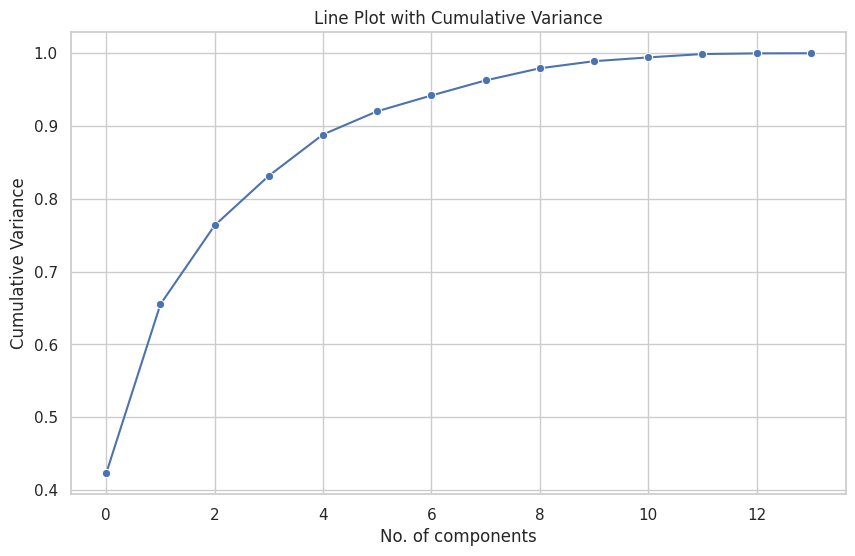

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=np.cumsum(pca1.explained_variance_ratio_), marker="o")

plt.title("Line Plot with Cumulative Variance")
plt.xlabel("No. of components")
plt.ylabel("Cumulative Variance")

plt.show()

Since we can see from the graph above only 3 components make up almost 80% of the variance, we can use PCA to reduce the dimensionality of our data.


In [221]:
pca = PCA(0.95)  # * Maintain 95% cumulative variance i.e. information
pca_2_components = PCA(
    n_components=2
)  # * Maintain 2 components regardless of the cumulative variance

In [222]:
X_pca = pca.fit_transform(X)

In [223]:
X_pca.shape

(465, 8)

In [224]:
pca.explained_variance_ratio_

array([0.42312516, 0.23206217, 0.10831924, 0.06817697, 0.05670704,
       0.0319129 , 0.02167454, 0.02071689])

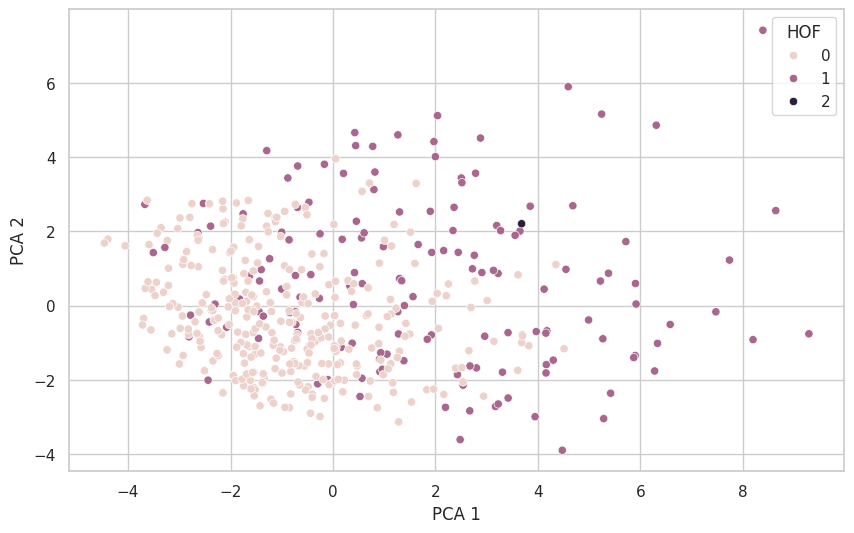

In [225]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
#! Vizulaizing only 2 components there are 6 more but not possilble to vizualize

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=52
)

print(f"Train Feature Shape: {X_train.shape}")
print(f"Test Feature Shape: {X_test.shape}")
print(f"Train Label Shape: {y_train.shape}")
print(f"Test Label Shape: {y_test.shape}")

Train Feature Shape: (372, 14)
Test Feature Shape: (93, 14)
Train Label Shape: (372,)
Test Label Shape: (93,)


In [227]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=52
)

print(f"Train Feature Shape: {X_train_pca.shape}")
print(f"Test Feature Shape: {X_test_pca.shape}")
print(f"Train Label Shape: {y_train.shape}")
print(f"Test Label Shape: {y_test.shape}")

Train Feature Shape: (372, 8)
Test Feature Shape: (93, 8)
Train Label Shape: (372,)
Test Label Shape: (93,)


In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
reg1 = LogisticRegression()

In [230]:
reg1.fit(X_train, y_train)

LogisticRegression()

In [231]:
reg1.score(X_test, y_test)

0.9139784946236559

In [232]:
reg2 = LogisticRegression()

In [233]:
reg2.fit(X_train_pca, y_train)

LogisticRegression()

In [234]:
reg2.score(X_test_pca, y_test)

0.9032258064516129